In [1]:
import requests
import json
import numpy as np
import datetime as dt
import pandas as pd
pd.options.display.max_columns = None


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
plt.style.use('seaborn')
import plotly.graph_objects as go

from cleaning import *
from station import *
import pickle

In [2]:
pickle_data()

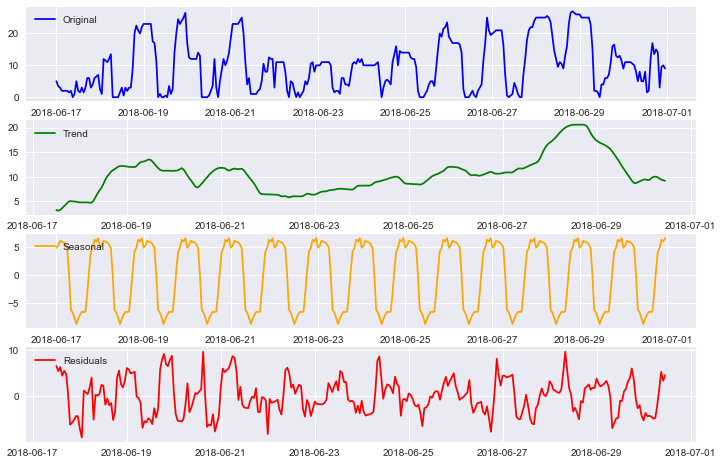

In [7]:
station_3172 = Station(3172)
ts = station_3172.avail_bikes_ts()['2018-06-17':'2018-06-30']
station_3172.availbike_decompose(time_interval=('2018-06-17','2018-06-30'))

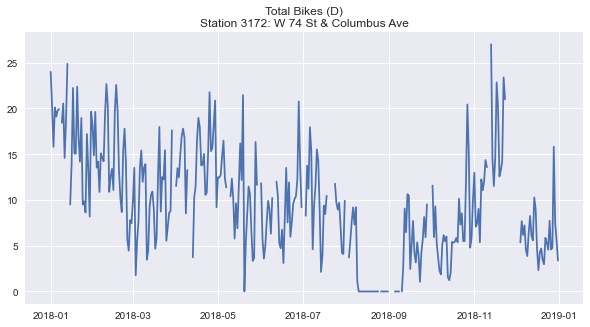

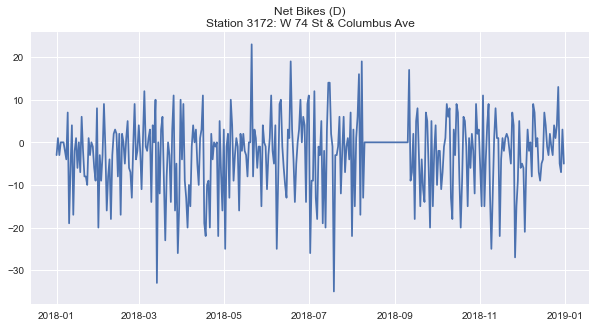

In [8]:
station_3172.plot_avail_bikes(resample='D')
station_3172.plot_net_bikes(resample='D');

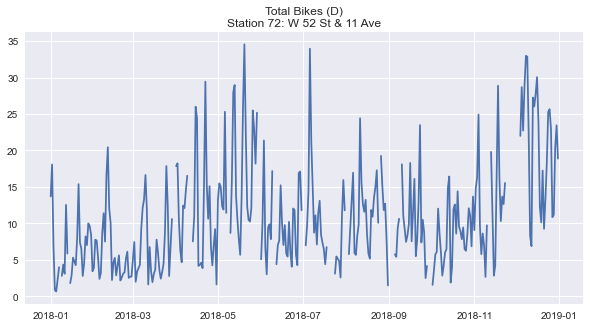

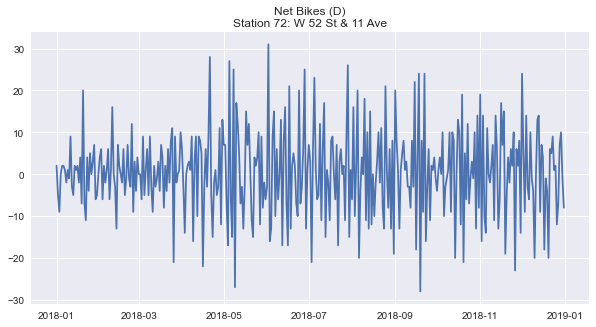

In [9]:
station_72 = Station(72)
station_72.plot_avail_bikes(resample='D')
station_72.plot_net_bikes(resample='D');

In [4]:
starts = pickle.load(open('starts.pickle','rb'))
ends = pickle.load(open('ends.pickle','rb'))
live = pickle.load(open('live.pickle','rb'))
trips = pickle.load(open('trips.pickle','rb'))
historical = pickle.load(open('historical.pickle','rb'))

In [11]:
trips_per_month = starts.droplevel(level=-2).start_station_name.resample('M').count()
trips_per_day = starts.droplevel(level=-2).start_station_name.resample('D').count()

Text(0.5, 1.0, 'Number of Trips per Month (2018)')

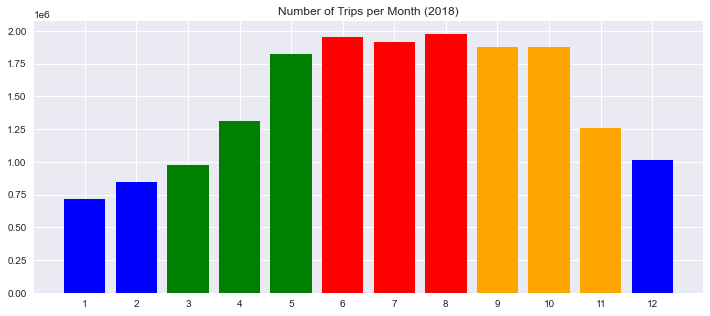

In [12]:
fig = plt.figure(figsize=(12,5))
plt.bar(list(trips_per_month.index.month),trips_per_month,color=['b','b','g','g','g','r','r','r','orange','orange','orange','b'])
plt.xticks(list(range(1,13)))
plt.title('Number of Trips per Month (2018)')

Text(0.5, 1.0, 'Number of Trips per Day (2018)')

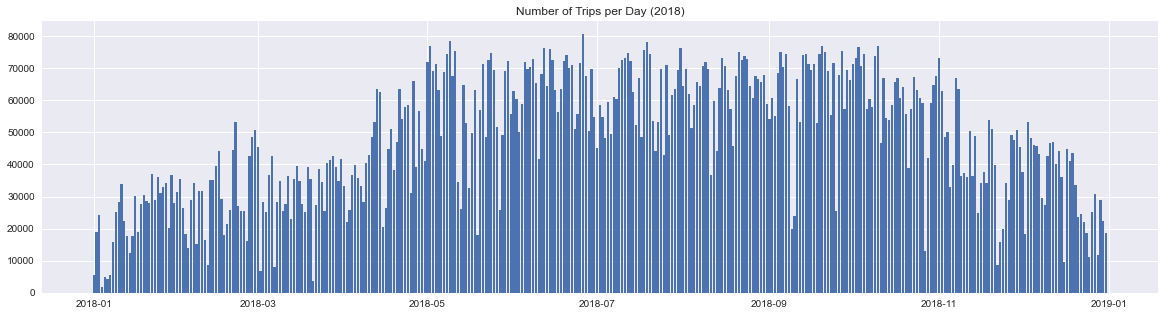

In [13]:
fig = plt.figure(figsize=(20,5))
plt.style.use('seaborn')
plt.bar(trips_per_day.index,trips_per_day)
plt.title('Number of Trips per Day (2018)')

In [137]:
len(historical.index.get_level_values(level=-2).unique())

709

In [147]:
jc_stations = live.loc[live.region_id=='70'].station_id.values
jc_stations

array([3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195, 3196, 3198,
       3199, 3201, 3202, 3203, 3205, 3206, 3207, 3209, 3210, 3211, 3212,
       3213, 3214, 3220, 3225, 3267, 3268, 3269, 3270, 3272, 3273, 3275,
       3276, 3277, 3278, 3279, 3280, 3281, 3481, 3483, 3638, 3639, 3640,
       3677, 3678, 3679, 3681, 3694, 3791, 3792])

In [164]:
stations_in_2018 = list(historical.index.get_level_values(level=-2).unique())
jc_stations_2018 = [x for x in stations_in_2018 if x in jc_stations]

station_counts_2018 = [len(stations_in_2018)-len(jc_stations_2018),len(jc_stations_2018)]
station_counts_2018

[668, 41]

Text(0.5, 1.0, 'Number of Stations')

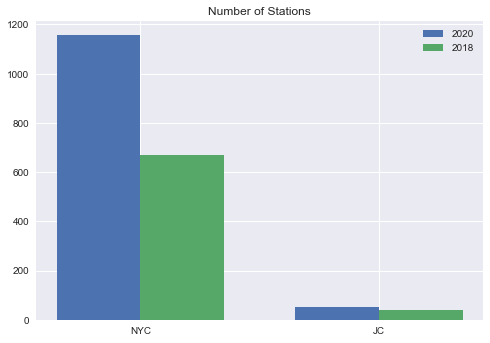

In [260]:
fig,ax = plt.subplots()

x= np.array([0,1])

bar_2020 = ax.bar(x - .35/2,live.region_id.value_counts(),.35,label='2020')
bar_2018 = ax.bar(x + .35/2, station_counts_2018,.35,label='2018')
ax = plt.gca()
#ax.set_ylim(top=1300)
ax.set_xticks([0,1])
ax.set_xticklabels(['NYC','JC'])
ax.legend()
plt.title('Number of Stations')

In [78]:
starts['weekday'] = np.where(starts.day_of_week<5,True,False)

In [79]:
weekdays = starts[starts.weekday==True].droplevel(level=-2)
weekends = starts[starts.weekday==False].droplevel(level=-2)

Text(0.5, 1.0, 'Number of Rides per hour')

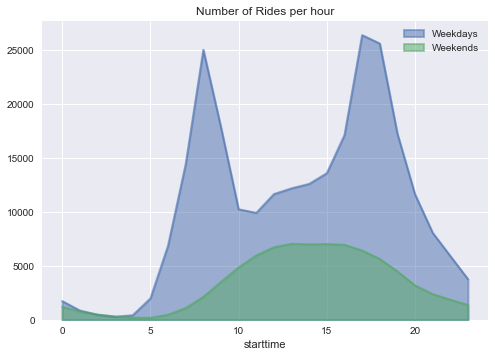

In [84]:
(weekdays.groupby(weekdays.index.hour).size()/52).plot(kind='area',label='Weekdays',linewidth=2,alpha=.5)
(weekends.groupby(weekends.index.hour).size()/52).plot(kind = 'area',label='Weekends',linewidth=2,alpha=.5)
plt.legend()
plt.title('Number of Rides per hour')

In [255]:
def search_station_name(query):
        return starts.loc[int(query)].start_station_name.unique()

In [256]:
search_station_name(3002)

array(['South End Ave & Liberty St'], dtype=object)

In [303]:
a = ([40.751873], [-73.977706])
a[1][0]

-73.977706

In [317]:
historical.loc[3002]

,station_name,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,percent_full,season
date_time,,,,,,,,,,
2018-01-01 00:26:00,South End Ave & Liberty St,8,17,25,40.711512,-74.015756,1,1,0.32,winter
2018-01-01 00:59:00,South End Ave & Liberty St,8,17,25,40.711512,-74.015756,1,1,0.32,winter
2018-01-01 01:32:00,South End Ave & Liberty St,8,17,25,40.711512,-74.015756,1,1,0.32,winter
2018-01-01 02:04:00,South End Ave & Liberty St,8,17,25,40.711512,-74.015756,1,1,0.32,winter
2018-01-01 02:38:00,South End Ave & Liberty St,8,17,25,40.711512,-74.015756,1,1,0.32,winter
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 20:22:00,South End Ave & Liberty St,21,3,25,40.711512,-74.015756,1,1,0.84,winter
2018-12-31 21:13:00,South End Ave & Liberty St,20,4,25,40.711512,-74.015756,1,1,0.80,winter
2018-12-31 21:54:00,South End Ave & Liberty St,20,4,25,40.711512,-74.015756,1,1,0.80,winter


In [320]:
list(historical.loc[3002]._lat.values)[0]

40.711512

In [293]:
top25_starts = pd.DataFrame.from_dict({'id':list(starts.index.get_level_values(level=-2).value_counts().index)[:25],
                                       'startcount':list(starts.index.get_level_values(level=-2).value_counts())[:25]})

top25_ends = pd.DataFrame.from_dict({'id':list(ends.index.get_level_values(level=-2).value_counts().index)[:25],
                                       'endcount':list(ends.index.get_level_values(level=-2).value_counts())[:25]})

top25_starts['name'] = top25_starts.id.apply(search_station_name)
top25_ends['name'] = top25_ends.id.apply(search_station_name)

top25_starts['coord'] = top25_starts.id.apply(get_lon_lat)
top25_ends['coord'] = top25_ends.id.apply(get_lon_lat)

In [290]:
def get_lon_lat(id):
    """
    Returns Longitude and Latitude coordinates as a tuple given a station id
    """

    return (live.loc[live.station_id == id].lat.values, live.loc[live.station_id == id].lon.values)

In [287]:
get_lon_lat(455)

(40.75001986, -73.96905301)

Text(0, 0.5, 'Number of Trips')

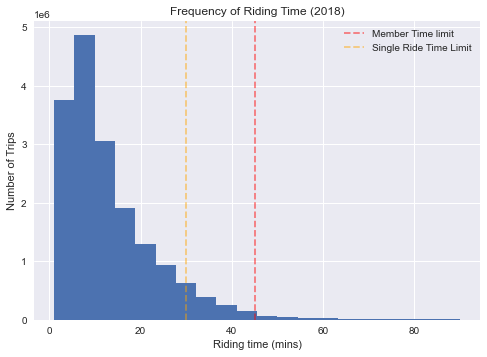

In [109]:

trips.loc[trips.tripduration <= 90].tripduration.plot(kind='hist',bins = 20,label='')
plt.axvline(x=45,color='red',label='Member Time limit',linestyle = '--',alpha=.5)
plt.axvline(x=30,color='orange',label='Single Ride Time Limit',linestyle='--',alpha=.5)
plt.legend()
plt.title('Frequency of Riding Time (2018)')
plt.xlabel('Riding time (mins)')
plt.ylabel('Number of Trips')

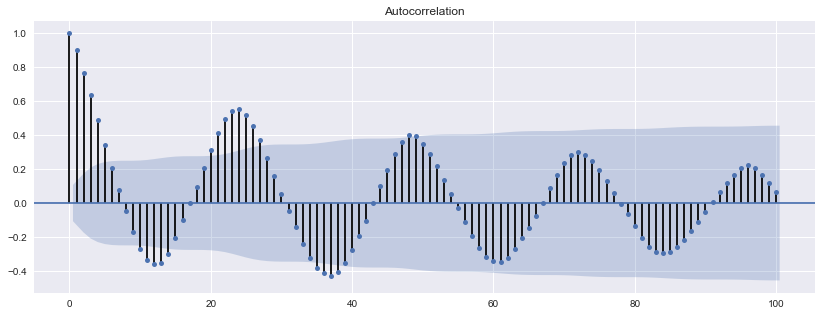

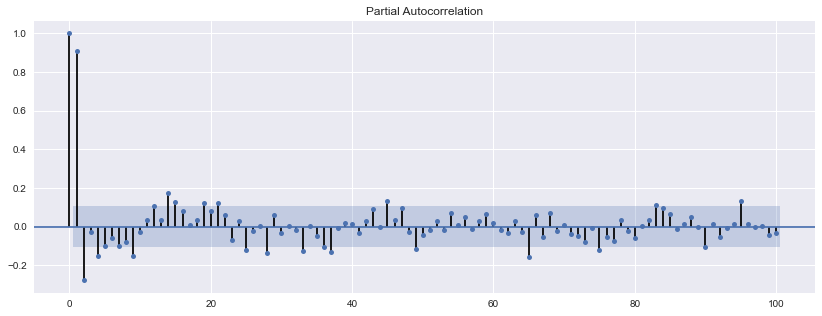

In [324]:
rcParams['figure.figsize'] = 14, 5

plot_acf(ts, lags=100);
plot_pacf(ts, lags=100);

In [165]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels as sm
import itertools

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

np.random.seed(7)


#Generate combinations of the number of AR(p), MA(q), and Differencing (q) terms
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2], 24) for x in pdq]
count = 1

##grid search parameters using generated list of combinations
models=[]
for comb in pdq:
    for combs in pdqs:
        try:
            arima = SARIMAX(ts, order=comb, seasonal_order=combs,
                          enforce_invertibility=False,enforce_stationarity=False)
            model = arima.fit()
            arima.fit()
            print(f'SARIMAX{count}: {comb} x {combs}, AIC: {model.aic}')
            models.append([comb,combs,model.aic])
            count += 1
        except:
            continue
            
models_df = pd.DataFrame(models, columns=['pdq', 'pdqs', 'aic'])
models_df.sort_values('aic')


SARIMAX: (0, 0, 0) x (0, 0, 0, 24), AIC: 2667.0475401251065
SARIMAX: (0, 0, 0) x (0, 0, 1, 24), AIC: 2318.9884553726233
SARIMAX: (0, 0, 0) x (0, 0, 2, 24), AIC: 2054.6671097433373
SARIMAX: (0, 0, 0) x (0, 1, 0, 24), AIC: 2137.346819051968
SARIMAX: (0, 0, 0) x (0, 1, 1, 24), AIC: 1883.4018065030057
SARIMAX: (0, 0, 0) x (0, 1, 2, 24), AIC: 1706.8592394651603
SARIMAX: (0, 0, 0) x (0, 2, 0, 24), AIC: 2244.2082234092354
SARIMAX: (0, 0, 0) x (0, 2, 1, 24), AIC: 1875.067637710354
SARIMAX: (0, 0, 0) x (0, 2, 2, 24), AIC: 1627.5522306431808
SARIMAX: (0, 0, 0) x (1, 0, 0, 24), AIC: 2124.764914737722
SARIMAX: (0, 0, 0) x (1, 0, 1, 24), AIC: 2047.27708154334
SARIMAX: (0, 0, 0) x (1, 0, 2, 24), AIC: 1873.39754108434
SARIMAX: (0, 0, 0) x (1, 1, 0, 24), AIC: 1935.520955773887
SARIMAX: (0, 0, 0) x (1, 1, 1, 24), AIC: 1874.3252592548506
SARIMAX: (0, 0, 0) x (1, 1, 2, 24), AIC: 1706.9325117827123
SARIMAX: (0, 0, 0) x (1, 2, 0, 24), AIC: 1930.224618868961
SARIMAX: (0, 0, 0) x (1, 2, 1, 24), AIC: 1845.865

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (0, 2, 2) x (2, 1, 2, 24), AIC: 1340.518247649023
SARIMAX: (0, 2, 2) x (2, 2, 0, 24), AIC: 1390.0270742716516
SARIMAX: (0, 2, 2) x (2, 2, 1, 24), AIC: 1333.6383008645175
SARIMAX: (0, 2, 2) x (2, 2, 2, 24), AIC: 1321.4337843689
SARIMAX: (1, 0, 0) x (0, 0, 0, 24), AIC: 1786.8565093531024
SARIMAX: (1, 0, 0) x (0, 0, 1, 24), AIC: 1658.979576632349
SARIMAX: (1, 0, 0) x (0, 0, 2, 24), AIC: 1503.7452047857746
SARIMAX: (1, 0, 0) x (0, 1, 0, 24), AIC: 1764.009422748039
SARIMAX: (1, 0, 0) x (0, 1, 1, 24), AIC: 1461.4111874941016
SARIMAX: (1, 0, 0) x (0, 1, 2, 24), AIC: 1346.0915515120746
SARIMAX: (1, 0, 0) x (0, 2, 0, 24), AIC: 1936.659253010719
SARIMAX: (1, 0, 0) x (0, 2, 1, 24), AIC: 1526.2306279733539
SARIMAX: (1, 0, 0) x (0, 2, 2, 24), AIC: 1287.817271152578
SARIMAX: (1, 0, 0) x (1, 0, 0, 24), AIC: 1652.771980745743
SARIMAX: (1, 0, 0) x (1, 0, 1, 24), AIC: 1610.06605287722
SARIMAX: (1, 0, 0) x (1, 0, 2, 24), AIC: 1482.6522925886775
SARIMAX: (1, 0, 0) x (1, 1, 0, 24), AIC: 1526.86879

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (1, 0, 0) x (2, 2, 2, 24), AIC: 1291.6155162450004
SARIMAX: (1, 0, 1) x (0, 0, 0, 24), AIC: 1765.7740084774578
SARIMAX: (1, 0, 1) x (0, 0, 1, 24), AIC: 1642.3236222078747
SARIMAX: (1, 0, 1) x (0, 0, 2, 24), AIC: 1491.0281750784575
SARIMAX: (1, 0, 1) x (0, 1, 0, 24), AIC: 1751.9989277012974
SARIMAX: (1, 0, 1) x (0, 1, 1, 24), AIC: 1454.2992436851605
SARIMAX: (1, 0, 1) x (0, 1, 2, 24), AIC: 1336.7668238685085
SARIMAX: (1, 0, 1) x (0, 2, 0, 24), AIC: 1921.117058925965
SARIMAX: (1, 0, 1) x (0, 2, 1, 24), AIC: 1511.909757667372
SARIMAX: (1, 0, 1) x (0, 2, 2, 24), AIC: 1279.7936462551006
SARIMAX: (1, 0, 1) x (1, 0, 0, 24), AIC: 1644.182682750615
SARIMAX: (1, 0, 1) x (1, 0, 1, 24), AIC: 1603.7037123132206
SARIMAX: (1, 0, 1) x (1, 0, 2, 24), AIC: 1475.5510820690295
SARIMAX: (1, 0, 1) x (1, 1, 0, 24), AIC: 1525.888668714452
SARIMAX: (1, 0, 1) x (1, 1, 1, 24), AIC: 1480.1908179641196
SARIMAX: (1, 0, 1) x (1, 1, 2, 24), AIC: 1329.7446450254656
SARIMAX: (1, 0, 1) x (1, 2, 0, 24), AIC: 158

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (1, 2, 2) x (1, 0, 2, 24), AIC: 1473.0618200212057
SARIMAX: (1, 2, 2) x (1, 1, 0, 24), AIC: 1546.2148457861977
SARIMAX: (1, 2, 2) x (1, 1, 1, 24), AIC: 1494.5049512624873
SARIMAX: (1, 2, 2) x (1, 1, 2, 24), AIC: 1338.1712871437219
SARIMAX: (1, 2, 2) x (1, 2, 0, 24), AIC: 1609.025240961253
SARIMAX: (1, 2, 2) x (1, 2, 1, 24), AIC: 1487.6634629081357
SARIMAX: (1, 2, 2) x (1, 2, 2, 24), AIC: 1317.8751304323987
SARIMAX: (1, 2, 2) x (2, 0, 0, 24), AIC: 1494.1511301703654
SARIMAX: (1, 2, 2) x (2, 0, 1, 24), AIC: 1482.7790002860393
SARIMAX: (1, 2, 2) x (2, 0, 2, 24), AIC: 1473.1966724144195
SARIMAX: (1, 2, 2) x (2, 1, 0, 24), AIC: 1389.8741871827538
SARIMAX: (1, 2, 2) x (2, 1, 1, 24), AIC: 1363.9700143299074
SARIMAX: (1, 2, 2) x (2, 1, 2, 24), AIC: 1348.8781992050426
SARIMAX: (1, 2, 2) x (2, 2, 0, 24), AIC: 1383.4720695465817
SARIMAX: (1, 2, 2) x (2, 2, 1, 24), AIC: 1338.732815214108
SARIMAX: (1, 2, 2) x (2, 2, 2, 24), AIC: 1322.114778141381
SARIMAX: (2, 0, 0) x (0, 0, 0, 24), AIC: 17

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 0, 0) x (0, 2, 0, 24), AIC: 1922.7740244944052
SARIMAX: (2, 0, 0) x (0, 2, 1, 24), AIC: 1518.7077809423834
SARIMAX: (2, 0, 0) x (0, 2, 2, 24), AIC: 1286.537734808859
SARIMAX: (2, 0, 0) x (1, 0, 0, 24), AIC: 1640.827264451132
SARIMAX: (2, 0, 0) x (1, 0, 1, 24), AIC: 1604.1530157376455
SARIMAX: (2, 0, 0) x (1, 0, 2, 24), AIC: 1482.984365470378
SARIMAX: (2, 0, 0) x (1, 1, 0, 24), AIC: 1520.2966263313072
SARIMAX: (2, 0, 0) x (1, 1, 1, 24), AIC: 1480.679319393897
SARIMAX: (2, 0, 0) x (1, 1, 2, 24), AIC: 1334.9430748482328
SARIMAX: (2, 0, 0) x (1, 2, 0, 24), AIC: 1581.37661418256
SARIMAX: (2, 0, 0) x (1, 2, 1, 24), AIC: 1475.0348370464474
SARIMAX: (2, 0, 0) x (1, 2, 2, 24), AIC: 1288.5377413667627
SARIMAX: (2, 0, 0) x (2, 0, 0, 24), AIC: 1477.4605413588342
SARIMAX: (2, 0, 0) x (2, 0, 1, 24), AIC: 1473.3043603436136
SARIMAX: (2, 0, 0) x (2, 0, 2, 24), AIC: 1460.1227194114335
SARIMAX: (2, 0, 0) x (2, 1, 0, 24), AIC: 1368.3064400637707
SARIMAX: (2, 0, 0) x (2, 1, 1, 24), AIC: 1342.

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 0, 2) x (0, 0, 2, 24), AIC: 1488.0120485493908
SARIMAX: (2, 0, 2) x (0, 1, 0, 24), AIC: 1742.9886228805967
SARIMAX: (2, 0, 2) x (0, 1, 1, 24), AIC: 1454.089368618863
SARIMAX: (2, 0, 2) x (0, 1, 2, 24), AIC: 1331.114333416565
SARIMAX: (2, 0, 2) x (0, 2, 0, 24), AIC: 1910.453448993204
SARIMAX: (2, 0, 2) x (0, 2, 1, 24), AIC: 1509.8467314161724
SARIMAX: (2, 0, 2) x (0, 2, 2, 24), AIC: 1281.1727634395738
SARIMAX: (2, 0, 2) x (1, 0, 0, 24), AIC: 1634.8145117979184
SARIMAX: (2, 0, 2) x (1, 0, 1, 24), AIC: 1601.7124125599337
SARIMAX: (2, 0, 2) x (1, 0, 2, 24), AIC: 1474.0295356595507
SARIMAX: (2, 0, 2) x (1, 1, 0, 24), AIC: 1523.7247075407145
SARIMAX: (2, 0, 2) x (1, 1, 1, 24), AIC: 1474.7952079871698
SARIMAX: (2, 0, 2) x (1, 1, 2, 24), AIC: 1324.3926197155029
SARIMAX: (2, 0, 2) x (1, 2, 0, 24), AIC: 1584.50294822778
SARIMAX: (2, 0, 2) x (1, 2, 1, 24), AIC: 1473.0204293934355


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 0, 2) x (1, 2, 2, 24), AIC: 1284.0460997959099
SARIMAX: (2, 0, 2) x (2, 0, 0, 24), AIC: 1480.1559012010887
SARIMAX: (2, 0, 2) x (2, 0, 1, 24), AIC: 1477.285463737641


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 0, 2) x (2, 0, 2, 24), AIC: 1459.1173564884145
SARIMAX: (2, 0, 2) x (2, 1, 0, 24), AIC: 1370.100262688444
SARIMAX: (2, 0, 2) x (2, 1, 1, 24), AIC: 1343.9948303812648
SARIMAX: (2, 0, 2) x (2, 1, 2, 24), AIC: 1333.0022468249126
SARIMAX: (2, 0, 2) x (2, 2, 0, 24), AIC: 1359.955700780598
SARIMAX: (2, 0, 2) x (2, 2, 1, 24), AIC: 1316.8018436968898
SARIMAX: (2, 0, 2) x (2, 2, 2, 24), AIC: 1306.4214930396104
SARIMAX: (2, 1, 0) x (0, 0, 0, 24), AIC: 1770.4030893892295
SARIMAX: (2, 1, 0) x (0, 0, 1, 24), AIC: 1652.1488025350313
SARIMAX: (2, 1, 0) x (0, 0, 2, 24), AIC: 1501.0600386165245
SARIMAX: (2, 1, 0) x (0, 1, 0, 24), AIC: 1762.636970420929
SARIMAX: (2, 1, 0) x (0, 1, 1, 24), AIC: 1481.1954261351696
SARIMAX: (2, 1, 0) x (0, 1, 2, 24), AIC: 1352.9925289692465
SARIMAX: (2, 1, 0) x (0, 2, 0, 24), AIC: 1933.0845417950425
SARIMAX: (2, 1, 0) x (0, 2, 1, 24), AIC: 1535.1169672614385
SARIMAX: (2, 1, 0) x (0, 2, 2, 24), AIC: 1299.5685931674261
SARIMAX: (2, 1, 0) x (1, 0, 0, 24), AIC: 16

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 1, 1) x (2, 0, 2, 24), AIC: 1473.4765103128734
SARIMAX: (2, 1, 1) x (2, 1, 0, 24), AIC: 1368.6679687888773
SARIMAX: (2, 1, 1) x (2, 1, 1, 24), AIC: 1344.2033158349811
SARIMAX: (2, 1, 1) x (2, 1, 2, 24), AIC: 1335.6191878868965
SARIMAX: (2, 1, 1) x (2, 2, 0, 24), AIC: 1361.3406932903035
SARIMAX: (2, 1, 1) x (2, 2, 1, 24), AIC: 1316.598875014431
SARIMAX: (2, 1, 1) x (2, 2, 2, 24), AIC: 1310.907125407476
SARIMAX: (2, 1, 2) x (0, 0, 0, 24), AIC: 1769.433877912403
SARIMAX: (2, 1, 2) x (0, 0, 1, 24), AIC: 1633.6190137842314
SARIMAX: (2, 1, 2) x (0, 0, 2, 24), AIC: 1496.591895881112
SARIMAX: (2, 1, 2) x (0, 1, 0, 24), AIC: 1743.226327541729
SARIMAX: (2, 1, 2) x (0, 1, 1, 24), AIC: 1456.278943489085
SARIMAX: (2, 1, 2) x (0, 1, 2, 24), AIC: 1331.1747466952193
SARIMAX: (2, 1, 2) x (0, 2, 0, 24), AIC: 1911.7098627640662
SARIMAX: (2, 1, 2) x (0, 2, 1, 24), AIC: 1510.3836969094907
SARIMAX: (2, 1, 2) x (0, 2, 2, 24), AIC: 1281.054609460983
SARIMAX: (2, 1, 2) x (1, 0, 0, 24), AIC: 1638.1

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 1, 2) x (1, 0, 1, 24), AIC: 1597.6084131487942


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 1, 2) x (1, 0, 2, 24), AIC: 1459.3329467657102
SARIMAX: (2, 1, 2) x (1, 1, 0, 24), AIC: 1524.3711675069403
SARIMAX: (2, 1, 2) x (1, 1, 1, 24), AIC: 1478.5165312540946
SARIMAX: (2, 1, 2) x (1, 1, 2, 24), AIC: 1323.7691784499088
SARIMAX: (2, 1, 2) x (1, 2, 0, 24), AIC: 1584.2134220228108
SARIMAX: (2, 1, 2) x (1, 2, 1, 24), AIC: 1474.6561529717083
SARIMAX: (2, 1, 2) x (1, 2, 2, 24), AIC: 1297.114272023606
SARIMAX: (2, 1, 2) x (2, 0, 0, 24), AIC: 1471.5745787955898


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 1, 2) x (2, 0, 1, 24), AIC: 1461.5743094522625


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 1, 2) x (2, 0, 2, 24), AIC: 1454.8170946590074
SARIMAX: (2, 1, 2) x (2, 1, 0, 24), AIC: 1369.0764256524853
SARIMAX: (2, 1, 2) x (2, 1, 1, 24), AIC: 1344.0580665375987


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 1, 2) x (2, 1, 2, 24), AIC: 1325.7872793144186
SARIMAX: (2, 1, 2) x (2, 2, 0, 24), AIC: 1363.3394057003384
SARIMAX: (2, 1, 2) x (2, 2, 1, 24), AIC: 1317.4852932471908
SARIMAX: (2, 1, 2) x (2, 2, 2, 24), AIC: 1307.1300873114692
SARIMAX: (2, 2, 0) x (0, 0, 0, 24), AIC: 1845.0933700908572
SARIMAX: (2, 2, 0) x (0, 0, 1, 24), AIC: 1720.2552066140556
SARIMAX: (2, 2, 0) x (0, 0, 2, 24), AIC: 1574.9721327666564
SARIMAX: (2, 2, 0) x (0, 1, 0, 24), AIC: 1880.0173276079477
SARIMAX: (2, 2, 0) x (0, 1, 1, 24), AIC: 1569.348811033924
SARIMAX: (2, 2, 0) x (0, 1, 2, 24), AIC: 1444.0277272574708
SARIMAX: (2, 2, 0) x (0, 2, 0, 24), AIC: 2044.7065997040438
SARIMAX: (2, 2, 0) x (0, 2, 1, 24), AIC: 1631.2546389177048
SARIMAX: (2, 2, 0) x (0, 2, 2, 24), AIC: 1383.3366473518824
SARIMAX: (2, 2, 0) x (1, 0, 0, 24), AIC: 1714.1800768765129
SARIMAX: (2, 2, 0) x (1, 0, 1, 24), AIC: 1709.7559135032784
SARIMAX: (2, 2, 0) x (1, 0, 2, 24), AIC: 1571.2774318018362
SARIMAX: (2, 2, 0) x (1, 1, 0, 24), AIC: 

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 2, 2) x (0, 1, 0, 24), AIC: 1753.2381389055256
SARIMAX: (2, 2, 2) x (0, 1, 1, 24), AIC: 1460.3608119304874
SARIMAX: (2, 2, 2) x (0, 1, 2, 24), AIC: 1345.5730617010843
SARIMAX: (2, 2, 2) x (0, 2, 0, 24), AIC: 1922.8524306774325
SARIMAX: (2, 2, 2) x (0, 2, 1, 24), AIC: 1519.4434406698738
SARIMAX: (2, 2, 2) x (0, 2, 2, 24), AIC: 1282.2391986905563
SARIMAX: (2, 2, 2) x (1, 0, 0, 24), AIC: 1642.3719034671012
SARIMAX: (2, 2, 2) x (1, 0, 1, 24), AIC: 1616.0828873287712


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 2, 2) x (1, 0, 2, 24), AIC: 1474.8813918098872
SARIMAX: (2, 2, 2) x (1, 1, 0, 24), AIC: 1530.5320031646859
SARIMAX: (2, 2, 2) x (1, 1, 1, 24), AIC: 1484.0774331750622


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 2, 2) x (1, 1, 2, 24), AIC: 1327.3865292368546
SARIMAX: (2, 2, 2) x (1, 2, 0, 24), AIC: 1590.5654914261559
SARIMAX: (2, 2, 2) x (1, 2, 1, 24), AIC: 1477.5428313401048
SARIMAX: (2, 2, 2) x (1, 2, 2, 24), AIC: 1312.5744007996334
SARIMAX: (2, 2, 2) x (2, 0, 0, 24), AIC: 1491.0990724544727
SARIMAX: (2, 2, 2) x (2, 0, 1, 24), AIC: 1481.6527625188264


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 2, 2) x (2, 0, 2, 24), AIC: 1473.5972963722263
SARIMAX: (2, 2, 2) x (2, 1, 0, 24), AIC: 1378.8147211450741
SARIMAX: (2, 2, 2) x (2, 1, 1, 24), AIC: 1350.4919895672801


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 2, 2) x (2, 1, 2, 24), AIC: 1331.5886295618461
SARIMAX: (2, 2, 2) x (2, 2, 0, 24), AIC: 1365.695329777449
SARIMAX: (2, 2, 2) x (2, 2, 1, 24), AIC: 1325.2344813867844


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX: (2, 2, 2) x (2, 2, 2, 24), AIC: 1313.3685614957917


,pdq,pdqs,aic
386,"(1, 1, 2)","(0, 2, 2, 24)",1279.498264
305,"(1, 0, 2)","(0, 2, 2, 24)",1279.725411
278,"(1, 0, 1)","(0, 2, 2, 24)",1279.793646
629,"(2, 1, 2)","(0, 2, 2, 24)",1281.054609
548,"(2, 0, 2)","(0, 2, 2, 24)",1281.172763
...,...,...,...
3,"(0, 0, 0)","(0, 1, 0, 24)",2137.346819
6,"(0, 0, 0)","(0, 2, 0, 24)",2244.208223
27,"(0, 0, 1)","(0, 0, 0, 24)",2300.165472
1,"(0, 0, 0)","(0, 0, 1, 24)",2318.988455


In [175]:
models_df.sort_values('aic').head(20)

,pdq,pdqs,aic
386,"(1, 1, 2)","(0, 2, 2, 24)",1279.498264
305,"(1, 0, 2)","(0, 2, 2, 24)",1279.725411
278,"(1, 0, 1)","(0, 2, 2, 24)",1279.793646
629,"(2, 1, 2)","(0, 2, 2, 24)",1281.054609
548,"(2, 0, 2)","(0, 2, 2, 24)",1281.172763
521,"(2, 0, 1)","(0, 2, 2, 24)",1281.755760
287,"(1, 0, 1)","(1, 2, 2, 24)",1281.793625
467,"(1, 2, 2)","(0, 2, 2, 24)",1282.125600
710,"(2, 2, 2)","(0, 2, 2, 24)",1282.239199
557,"(2, 0, 2)","(1, 2, 2, 24)",1284.046100


In [20]:
best_arima = SARIMAX(ts, order=(1,0,2),seasonal_order=(0,2,2,24),
                    enforce_invertibility=False,enforce_stationarity=False)
results = best_arima.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        avail_bikes   No. Observations:                  336
Model:             SARIMAX(1, 0, 2)x(0, 2, 2, 24)   Log Likelihood                -633.863
Date:                            Sat, 12 Dec 2020   AIC                           1279.725
Time:                                    13:16:42   BIC                           1300.534
Sample:                                06-17-2018   HQIC                          1288.112
                                     - 06-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8752      0.047     18.813      0.000       0.784       0.966
ma.L1          0.0877      0.077      1.138      0.255      -0.063       0.239
ma.L2         -0.1087      0.084     -1.297      0.195      -0.273       0.056
ma.S.L24      -1.8108     37.618     -0.048      0.962     -75.540      71.919
ma.S.L48       0.8114     30.482      0.027      0.979     -58.932      60.555
sigma2         8.6936    327.247      0.027      0.979    -632.698     650.086
===================================================================================
Ljung-Box (Q):                       23.74   Jarque-Bera (JB):                 9.67
Prob(Q):                              0.98   Prob(JB):                         0.01
Heteroskedasticity (H):               0.89   Skew:                            -0.23
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

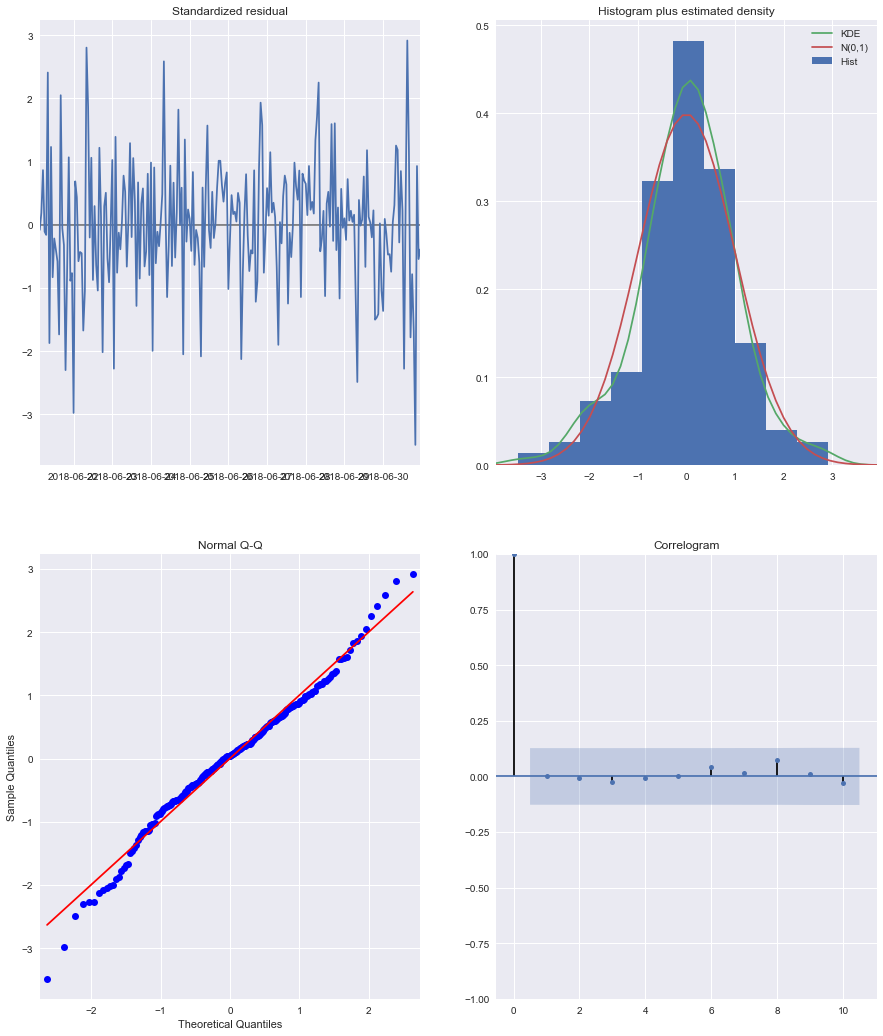

In [21]:
results.plot_diagnostics(figsize=(15,18))
plt.show()

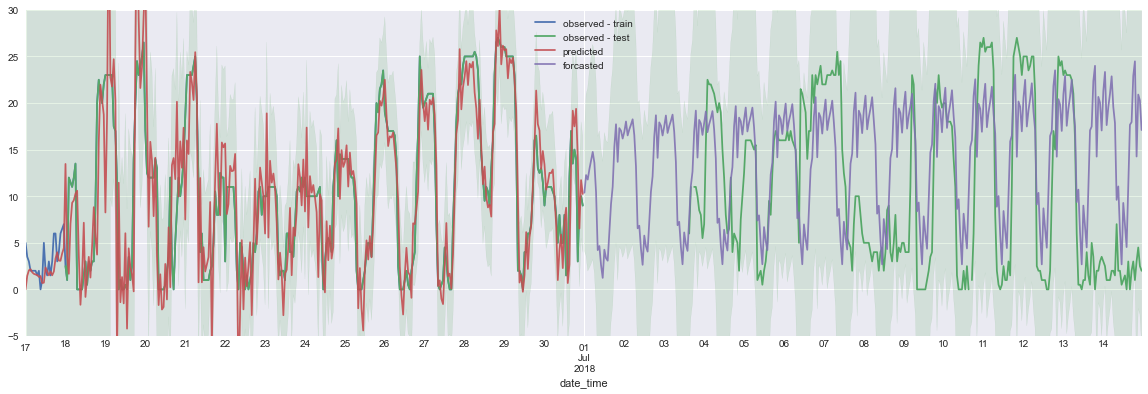

In [22]:
#get predictions

pred = results.get_prediction(start=pd.to_datetime('2018-06-17'),dynamic=False,full_results=True)
pred_conf = pred.conf_int()

forcast = results.get_forecast(steps=336)
for_conf = forcast.conf_int()

rcParams['figure.figsize'] = 20, 6

ax = ts.plot(label='observed - train')

station_3172.avail_bikes_ts()['2018-06-18':'2018-07-14'].plot(label='observed - test')

pred.predicted_mean.plot(ax=ax, label='predicted',alpha=0.9)
forcast.predicted_mean.plot(ax=ax, label='forcasted', alpha=0.9)

ax.fill_between(pred_conf.index,
               pred_conf.iloc[:, 0],
               pred_conf.iloc[:,1], color='g',alpha=0.1)
ax.fill_between(for_conf.index,
               for_conf.iloc[:, 0],
               for_conf.iloc[:,1], color='g',alpha=0.1)

ax.set_ylim(bottom=-5, top=30)

plt.legend();

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [33]:
forcast.predicted_mean

2018-07-01 00:00:00    10.377869
2018-07-01 01:00:00    12.269814
2018-07-01 02:00:00    11.786815
2018-07-01 03:00:00    12.901374
2018-07-01 04:00:00    13.848605
                         ...    
2018-07-14 19:00:00    24.476896
2018-07-14 20:00:00    14.262274
2018-07-14 21:00:00    20.907789
2018-07-14 22:00:00    20.271667
2018-07-14 23:00:00    17.102502
Freq: H, Length: 336, dtype: float64

In [36]:
train_rmse = mean_squared_error(y_true=station_3172.avail_bikes_ts()['2018-06-17':'2018-06-30'],
                   y_pred=pred.predicted_mean,
                   squared=False)

test_rmse = mean_squared_error(y_true=station_3172.avail_bikes_ts()['2018-07-03 15:00:00':'2018-07-14'].interpolate(),
                               y_pred=forcast.predicted_mean['2018-07-03 15:00:00':'2018-07-14'],
                               squared=False)

train_mae = mean_absolute_error(y_true=station_3172.avail_bikes_ts()['2018-06-17':'2018-06-30'],
                   y_pred=pred.predicted_mean[:'2018-06-30'])

test_mae = mean_absolute_error(y_true=station_3172.avail_bikes_ts()['2018-07-03 15:00:00':'2018-07-14'].interpolate(),
                               y_pred=forcast.predicted_mean['2018-07-03 15:00:00':'2018-07-14'])

print(f'Train RMSE: {train_rmse}')
print(f'Train MAE:  {train_mae}\n')

print(f'Test RMSE: {test_rmse}')
print(f'Test MAE:  {test_mae}')

Train RMSE: 4.659949020571311
Train MAE:  3.227939818114892

Test RMSE: 9.124396495011087
Test MAE:  7.372388410545595


In [215]:
import json

path = '/Users/mitchellkrieger/.secret/mapbox_api.json'

with open(path) as f:
    api = json.load(f)
    
api_key = api['api_token']

In [220]:
ts_stations = load(open('historical.pickle','rb'))

In [221]:
map_data = ts_stations.swaplevel()
map_data.sort_values(['date_time','station_id'],inplace=True)

In [222]:
map_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7385008 entries, (Timestamp('2018-01-01 00:26:00'), 72) to (Timestamp('2018-12-31 23:30:00'), 3529)
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   station_name  object 
 1   avail_bikes   int64  
 2   avail_docks   int64  
 3   tot_docks     int64  
 4   _lat          float64
 5   _long         float64
 6   in_service    int64  
 7   status_key    int64  
 8   percent_full  float64
 9   season        object 
dtypes: float64(3), int64(5), object(2)
memory usage: 592.0+ MB


In [224]:
hours = ts_stations.groupby([pd.Grouper(freq='H',level='date_time'),
                  pd.Grouper(level='station_id')]).mean()

In [225]:
time_interval = hours.index.levels[0].to_list()[167*24:181*24]

In [226]:
hours['id']=[i[1] for i in list(hours.index)]
hours['dt']=[str(i[0]) for i in list(hours.index)]

In [227]:
hours_slice = hours.xs(slice('2018-06-17','2018-06-30'),level=-2)


In [27]:
starts_by_hour.xs(slice('2018-06-17','2018-06-30'),level=-2).head()

,tripduration,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,id,dt
start_station_id,,,,,,,,,,,
79.0,1229.000000,40.719116,-74.006667,472.0,40.745712,-73.981948,14783.000000,1973.000000,1.0,79.0,2018-06-17 00:00:00
83.0,1007.333333,40.683826,-73.976323,2521.0,40.677089,-73.964979,23813.000000,1991.333333,1.0,83.0,2018-06-17 00:00:00
127.0,466.333333,40.731724,-74.006744,280.0,40.729074,-73.992143,24253.333333,1995.666667,1.0,127.0,2018-06-17 00:00:00
128.0,1083.600000,40.727103,-74.002971,346.0,40.730922,-73.999695,30105.800000,1979.400000,1.0,128.0,2018-06-17 00:00:00
144.0,422.500000,40.698399,-73.980689,1959.0,40.696682,-73.976048,20526.000000,1985.000000,1.0,144.0,2018-06-17 00:00:00


In [105]:
hours.head()

avail_bikes  avail_docks  tot_docks       _lat  \
date_time  station_id                                                   
2018-01-01 72                 13.0         26.0       39.0  40.767272   
           79                  4.0         29.0       33.0  40.719116   
           82                  3.0         24.0       27.0  40.711174   
           83                 30.0         32.0       62.0  40.683826   
           116                 0.0          1.0        7.0  40.741776   

                           _long  in_service  status_key  percent_full   id  \
date_time  station_id                                                         
2018-01-01 72         -73.993929         1.0         1.0      0.333333   72   
           79         -74.006667         1.0         1.0      0.121212   79   
           82         -74.000165         1.0         1.0      0.111111   82   
           83         -73.976323         1.0         1.0      0.483871   83   
           116        -74.001497         0.0         3.0      0.000000  116   

                                        dt  
date_time  station_id                       
2018-01-01 72          2018-01-01 00:00:00  
           79          2018-01-01 00:00:00  
           82          2018-01-01 00:00:00  
           83          2018-01-01 00:00:00  
           116         2018-01-01 00:00:00

In [231]:
import plotly.express as px

# px.set_mapbox_access_token(api_key)
# fig = px.scatter_mapbox(hours_slice, lat="_lat", lon="_long",
#                         animation_frame='dt', animation_group='id',
#                         color="percent_full", size="avail_bikes",
#                         color_continuous_scale=px.colors.cyclical.IceFire, size_max=15,
#                         zoom=10,width=800,height=800)

# fig.write_html('percent_full_map.html')
# fig.show()

In [30]:
ends = load(open('ends.pickle','rb'))
ends.dropna(inplace=True)

In [62]:
starts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17545842 entries, (72.0, Timestamp('2018-01-01 13:50:57.434000')) to (3721.0, Timestamp('2018-12-31 17:41:15.333000'))
Data columns (total 13 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int64         
 1   stoptime                 datetime64[ns]
 2   start_station_name       object        
 3   start_station_latitude   float64       
 4   start_station_longitude  float64       
 5   end_station_id           float64       
 6   end_station_name         object        
 7   end_station_latitude     float64       
 8   end_station_longitude    float64       
 9   bikeid                   int64         
 10  usertype                 object        
 11  birth_year               int64         
 12  gender                   int64         
dtypes: datetime64[ns](1), float64(5), int64(4), object(3)
memory usage: 2.6+ GB


In [77]:
starts_by_hour = starts.swaplevel().sort_values(['starttime','start_station_id']). \
                groupby([pd.Grouper(freq='H',level='starttime'),
                  pd.Grouper(level='start_station_id')]).count()

starts_by_hour['id']=[i[1] for i in list(starts_by_hour.index)]
starts_by_hour['dt']=[str(i[0]) for i in list(starts_by_hour.index)]

starts_slice = starts_by_hour.xs(slice('2018-06-17','2018-06-30'),level=-2)


ends_by_hour = ends.swaplevel().sort_values(['stoptime','end_station_id']). \
                groupby([pd.Grouper(freq='H',level='stoptime'),
                  pd.Grouper(level='end_station_id')]).count()

ends_by_hour['id']=[i[1] for i in list(ends_by_hour.index)]
ends_by_hour['dt']=[str(i[0]) for i in list(ends_by_hour.index)]

ends_slice = ends_by_hour.xs(slice('2018-06-17','2018-06-30'),level=-2)

In [78]:
ends_slice = ends_slice[['end_station_name','id','dt']]
ends_slice

,end_station_name,id,dt
end_station_id,,,
79.0,1,79.0,2018-06-17 00:00:00
128.0,3,128.0,2018-06-17 00:00:00
143.0,4,143.0,2018-06-17 00:00:00
144.0,1,144.0,2018-06-17 00:00:00
146.0,5,146.0,2018-06-17 00:00:00
...,...,...,...
3674.0,3,3674.0,2018-06-30 23:00:00
3676.0,2,3676.0,2018-06-30 23:00:00
3684.0,2,3684.0,2018-06-30 23:00:00


In [82]:
starts_slice = starts_slice[['start_station_name','id','dt']]
starts_slice

,start_station_name,id,dt
start_station_id,,,
79.0,1,79.0,2018-06-17 00:00:00
83.0,3,83.0,2018-06-17 00:00:00
127.0,3,127.0,2018-06-17 00:00:00
128.0,5,128.0,2018-06-17 00:00:00
144.0,2,144.0,2018-06-17 00:00:00
...,...,...,...
3680.0,1,3680.0,2018-06-30 23:00:00
3684.0,4,3684.0,2018-06-30 23:00:00
3686.0,3,3686.0,2018-06-30 23:00:00


In [143]:
net = pd.merge(ends_slice,starts_slice,how='outer',on=['id','dt'])
net.isna().sum()

end_station_name      26808
id                        0
dt                        0
start_station_name    27167
dtype: int64

In [144]:
net.end_station_name = np.where(net.end_station_name.isna(), 0, net.end_station_name)
net.start_station_name = np.where(net.start_station_name.isna(), 0, net.start_station_name)

In [145]:
net['net'] = net.end_station_name - net.start_station_name

In [146]:
net.id = net.id.astype(int)
net.head()

,end_station_name,id,dt,start_station_name,net
0,1.0,79,2018-06-17 00:00:00,1.0,0.0
1,3.0,128,2018-06-17 00:00:00,5.0,-2.0
2,4.0,143,2018-06-17 00:00:00,0.0,4.0
3,1.0,144,2018-06-17 00:00:00,2.0,-1.0
4,5.0,146,2018-06-17 00:00:00,3.0,2.0


In [147]:
lat_lon_id = live[['station_id','station_name','lat','lon']]
net = pd.merge(net,lat_lon_id,left_on='id',right_on='station_id')

In [148]:
net['abs_net'] = np.abs(net.net)
net.head()

,end_station_name,id,dt,start_station_name,net,station_id,station_name,lat,lon,abs_net
0,1.0,79,2018-06-17 00:00:00,1.0,0.0,79,Franklin St & W Broadway,40.719116,-74.006667,0.0
1,1.0,79,2018-06-17 06:00:00,0.0,1.0,79,Franklin St & W Broadway,40.719116,-74.006667,1.0
2,1.0,79,2018-06-17 07:00:00,1.0,0.0,79,Franklin St & W Broadway,40.719116,-74.006667,0.0
3,2.0,79,2018-06-17 08:00:00,0.0,2.0,79,Franklin St & W Broadway,40.719116,-74.006667,2.0
4,1.0,79,2018-06-17 09:00:00,3.0,-2.0,79,Franklin St & W Broadway,40.719116,-74.006667,2.0


In [232]:
import plotly.express as px

# px.set_mapbox_access_token(api_key)
# fig = px.scatter_mapbox(net, lat="lat", lon="lon",
#                         hover_name='station_name',hover_data=['station_id','net'],
#                         animation_frame='dt', animation_group='id',
#                         color="net", size="abs_net",
#                         color_continuous_scale=px.colors.sequential.RdBu, 
#                         color_continuous_midpoint=0, range_color=[-50,50],size_max=20,
#                         zoom=10,width=800,height=800)

# fig.write_html('nets_map.html')
# fig.show()

In [8]:
from fbprophet import Prophet

In [15]:
df = ts.reset_index()
df.rename(columns={'date_time':'ds','avail_bikes':'y'},inplace=True)
df

,ds,y
0,2018-06-17 00:00:00,5.0
1,2018-06-17 01:00:00,3.5
2,2018-06-17 02:00:00,3.0
3,2018-06-17 03:00:00,2.0
4,2018-06-17 04:00:00,2.0
...,...,...
331,2018-06-30 19:00:00,14.0
332,2018-06-30 20:00:00,3.0
333,2018-06-30 21:00:00,9.5
334,2018-06-30 22:00:00,10.0


In [16]:
import pickle

In [17]:
pickle_out = open('train_ts.pickle','wb')
pickle.dump(df,pickle_out)
pickle_out.close()

In [18]:
df_test = station_3172.avail_bikes_ts()['2018-06-18':'2018-07-14'].reset_index()
df_test.rename(columns={'date_time':'ds','avail_bikes':'y'},inplace=True)

pickle_out = open('test_ts.pickle','wb')
pickle.dump(df_test,pickle_out)
pickle_out.close()

,station_id,station_name,avail_bikes,avail_docks,tot_docks,_lat,_long,in_service,status_key,percent_full,season
date_time,,,,,,,,,,,
2018-01-01 00:26:00,72,W 52 St & 11 Ave,13,26,39,40.767272,-73.993929,1,1,0.333333,winter
2018-01-01 00:59:00,72,W 52 St & 11 Ave,13,26,39,40.767272,-73.993929,1,1,0.333333,winter
2018-01-01 01:32:00,72,W 52 St & 11 Ave,13,26,39,40.767272,-73.993929,1,1,0.333333,winter
2018-01-01 02:04:00,72,W 52 St & 11 Ave,13,26,39,40.767272,-73.993929,1,1,0.333333,winter
2018-01-01 02:38:00,72,W 52 St & 11 Ave,13,26,39,40.767272,-73.993929,1,1,0.333333,winter
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-17 19:04:00,3530,Crescent St & Ditmars Blvd,0,19,19,40.778718,-73.914564,1,1,0.000000,winter
2018-12-17 19:54:00,3530,Crescent St & Ditmars Blvd,0,19,19,40.778718,-73.914564,1,1,0.000000,winter
2018-09-08 11:24:00,3629,Adam Clayton Powell Blvd & W 126 St,17,15,33,40.809495,-73.947765,1,1,0.515152,fall
